In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df=pd.read_csv(r"/Users/shyam/Desktop/Visa_prediction/Dataset/h1b_kaggle.csv")
df.shape

(3002458, 11)

In [6]:
# lists the five rows of the dataset
df.head()

Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [7]:
# Gives the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [8]:
#gives the count of each classes of case status
df.CASE_STATUS.value_counts() 

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

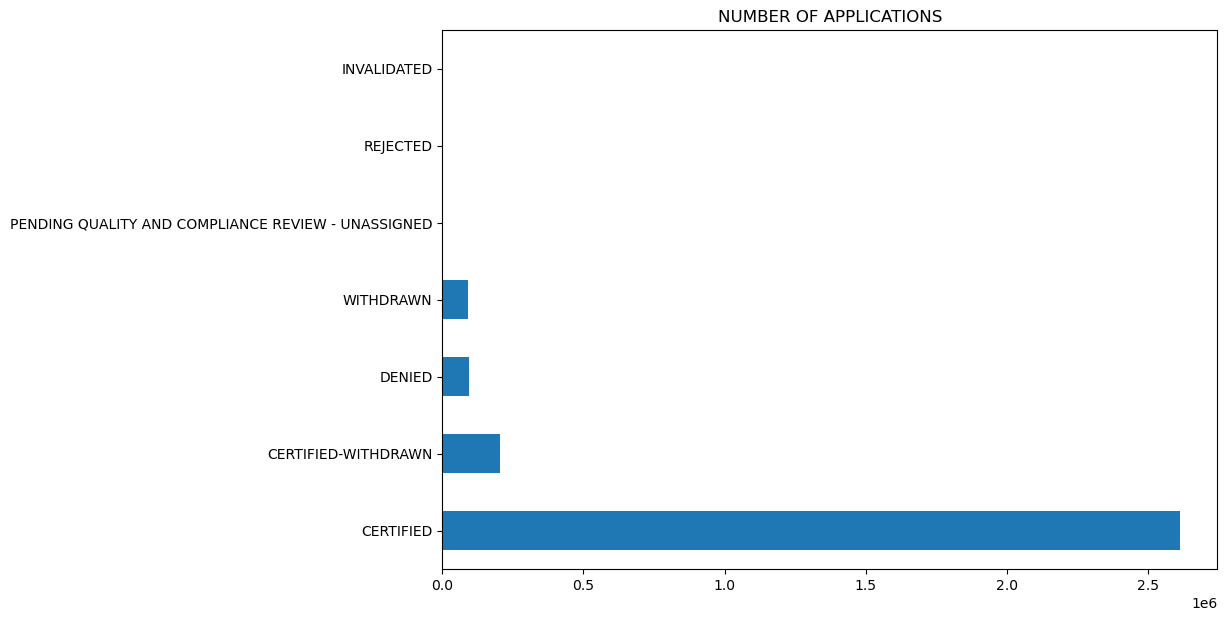

In [9]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot:>

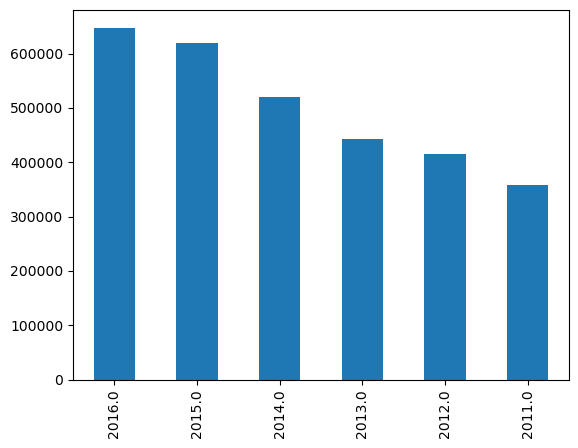

In [10]:
df.YEAR.value_counts().plot(kind = 'bar')

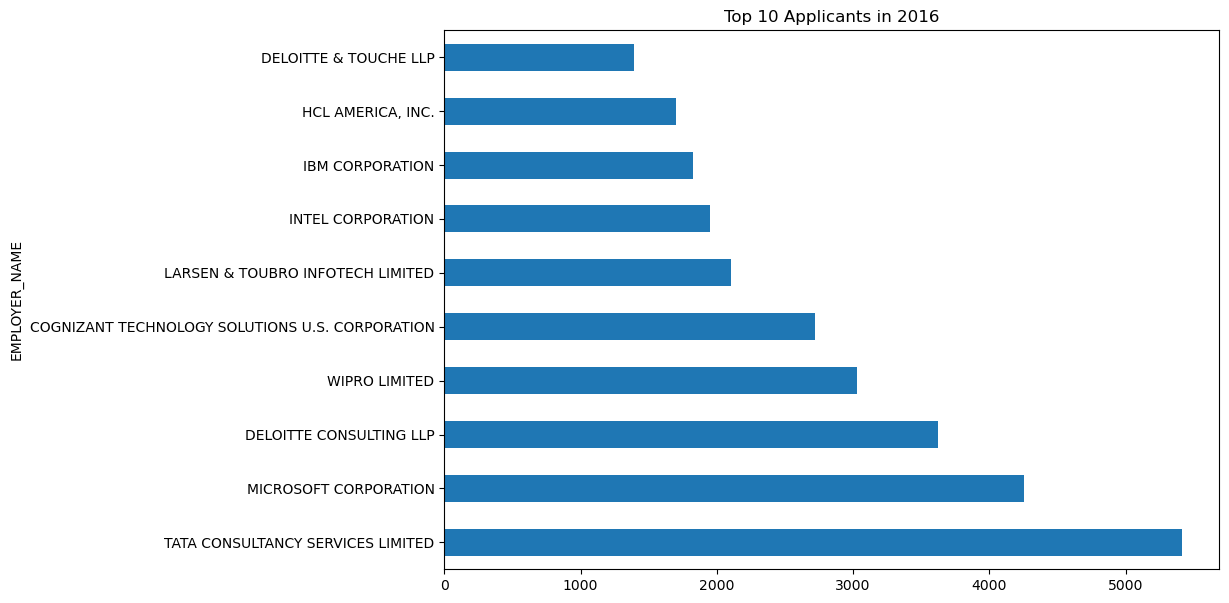

In [11]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016")
ax1.set_label("")
plt.show()

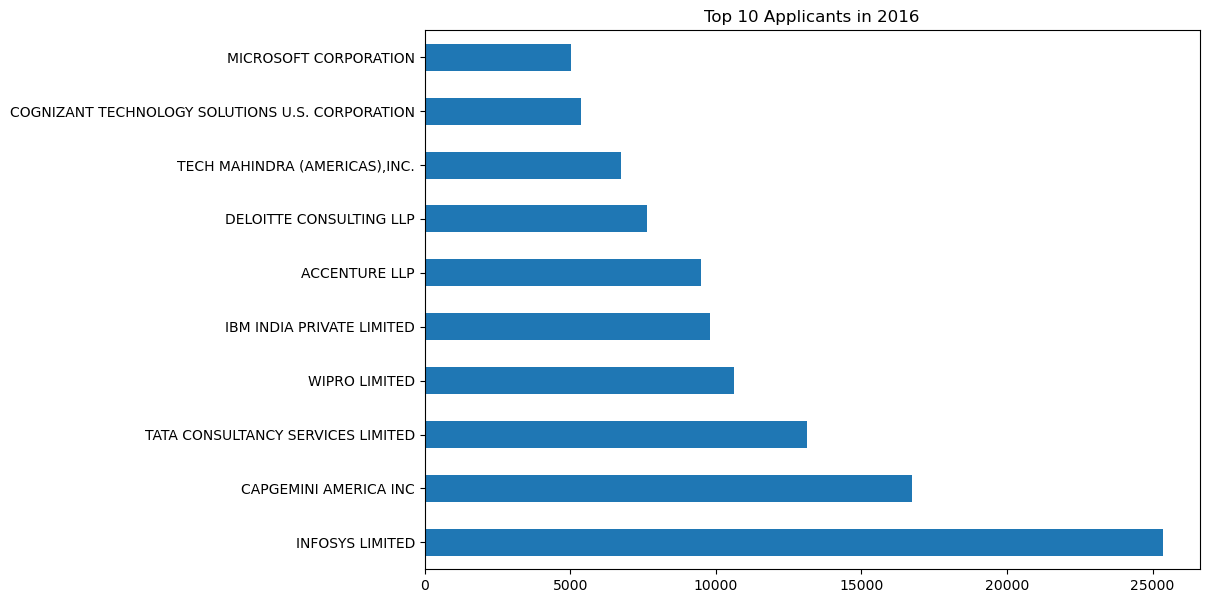

In [12]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

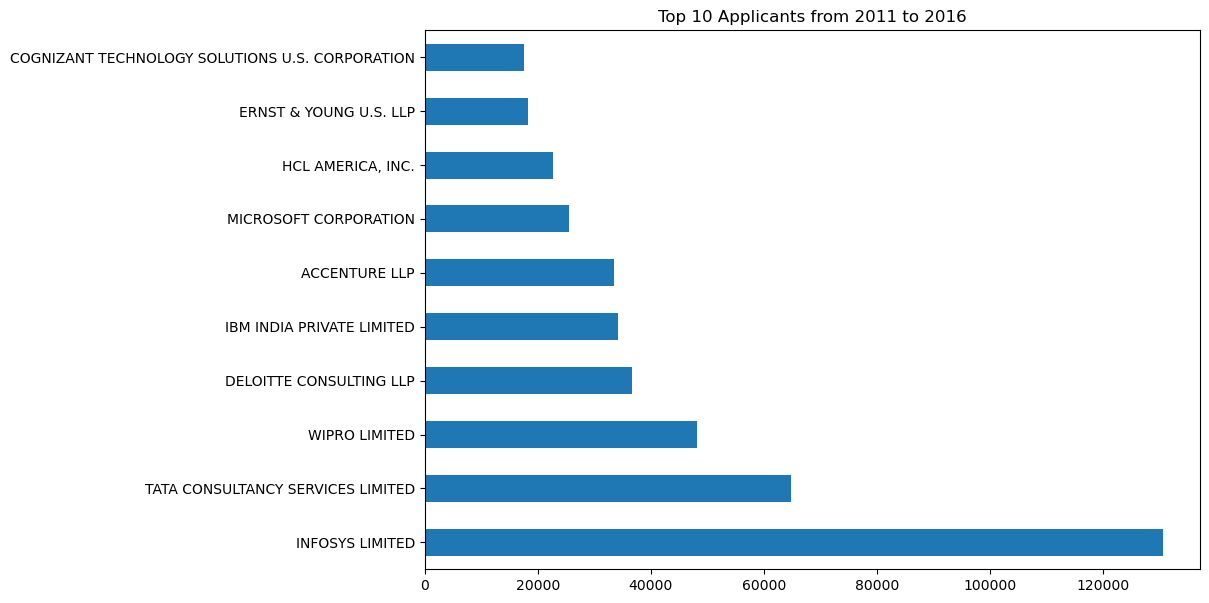

In [13]:
plt.figure(figsize=(10,7))

ax3 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

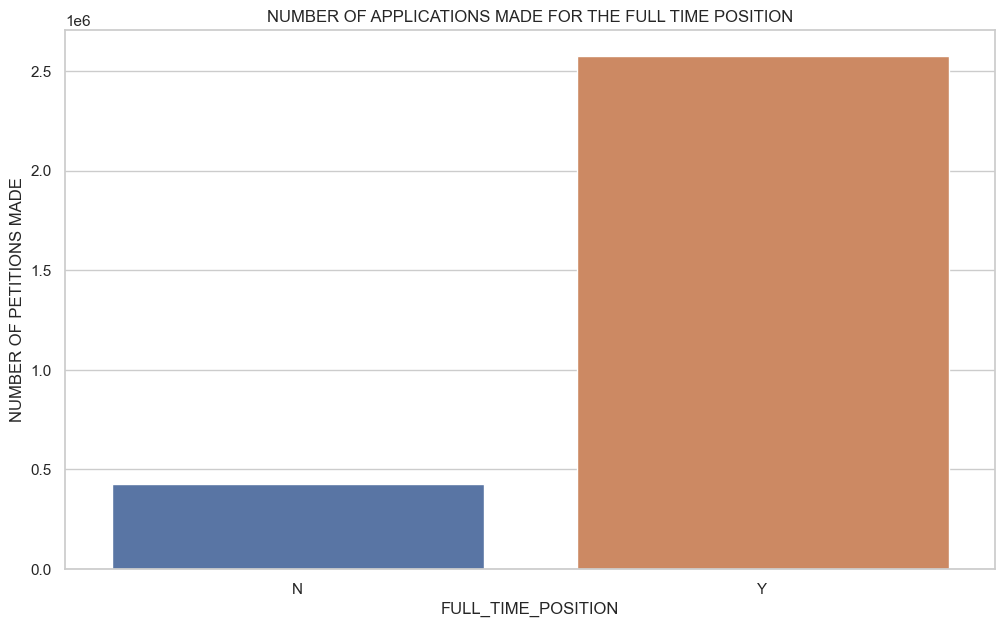

In [14]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [15]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

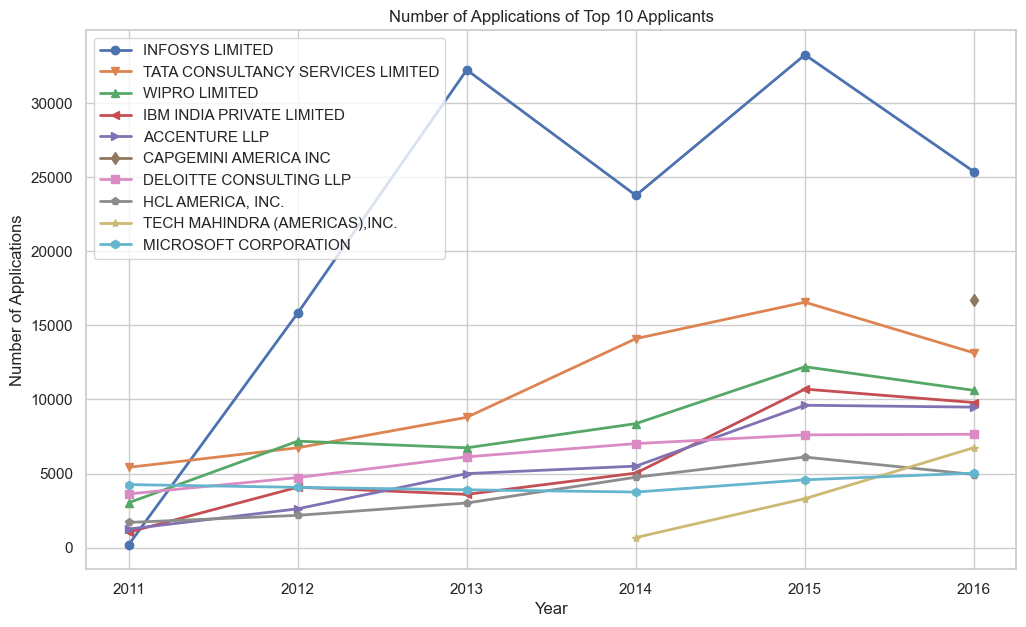

In [17]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

# Removing Outliers¶

In [18]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

# Checking for null values¶

In [19]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [20]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

In [21]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME                   0
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

# Label enconding the CASE_STATUS feature

In [22]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

In [23]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

Unnamed: 0  CASE_STATUS                                      EMPLOYER_NAME  \
0           1            1                             UNIVERSITY OF MICHIGAN   
1           2            1                             GOODMAN NETWORKS, INC.   
2           3            1                          PORTS AMERICA GROUP, INC.   
3           4            1  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4           5            3                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

   FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                   0          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                   1         242674.0  2016.0             PLANO, TEXAS   
2                   1         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                   1         220314.0  2016.0         DENVER, COLORADO   
4                   1         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [24]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

/var/folders/9x/ppktj64x5yd_xp7rxg1yjvh80000gn/T/ipykernel_3707/938964257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
/var/folders/9x/ppktj64x5yd_xp7rxg1yjvh80000gn/T/ipykernel_3707/938964257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
/var/folders/9x/ppktj64x5yd_xp7rxg1yjvh80000gn/T/ipykernel_3707/938964257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [25]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [27]:
df = df.drop(['SOC_NAME1'], axis=1)

<AxesSubplot:>

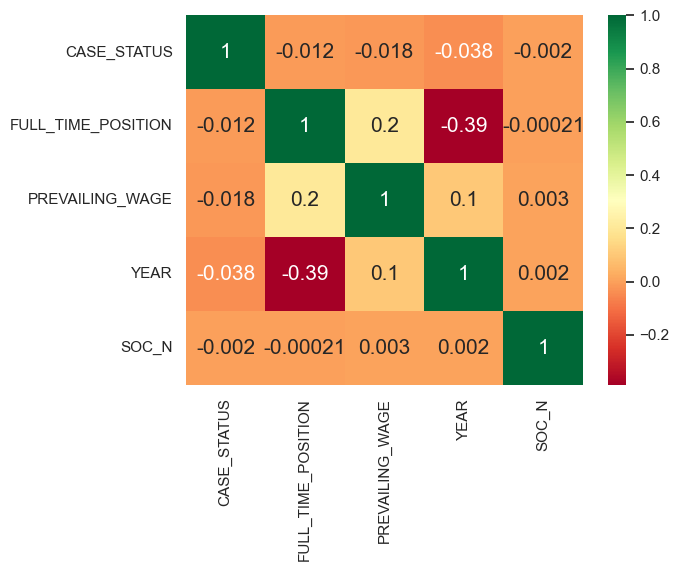

In [28]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [29]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Model Fitting by using Random Forest Classifier